In [39]:
import numpy as np
from scipy import integrate

nmult = 50
passivecrop = False


fname_b = f'../data/treecorr_cross_bright_{nmult}'
fname_f = f'../data/treecorr_cross_faint_{nmult}'
if passivecrop==True:
    fname_b+='_passivecrop'
    fname_f+='_passivecrop'
fname_b+='.npz'
fname_f+='.npz'


cross_bright = np.load(fname_b)
r, xib, sigb = cross_bright['arr_0'],cross_bright['arr_1'],cross_bright['arr_2']

cutoff = 5

int_b = integrate.simpson(xib[:-cutoff],x=r[:-cutoff])

fname_b = f'../data/treecorr_cross_faint_{nmult}.npz'
cross_faint = np.load(fname_f)
r, xif, sigf = cross_faint['arr_0'],cross_faint['arr_1'],cross_faint['arr_2']

int_f = integrate.simpson(xif[:-cutoff],x=r[:-cutoff])

print(int_b/int_f)

5.470646070730711


In [14]:
from astropy.io import ascii

# Read Gxs
filename_g = '../data/VLS/2MRSxWISE_VLS_passivecrop.txt'
data = ascii.read(filename_g)

# Bright/Faint
data_bright = data[(data['K_abs']<-23.2)&(data['K_abs']>-26.)]
data_faint = data[(data['K_abs']>-23.2)&(data['K_abs']<-22.)]

10**(-.4*(np.mean(data_bright['K_abs'])-np.mean(data_faint['K_abs'])))

3.5476293787308806

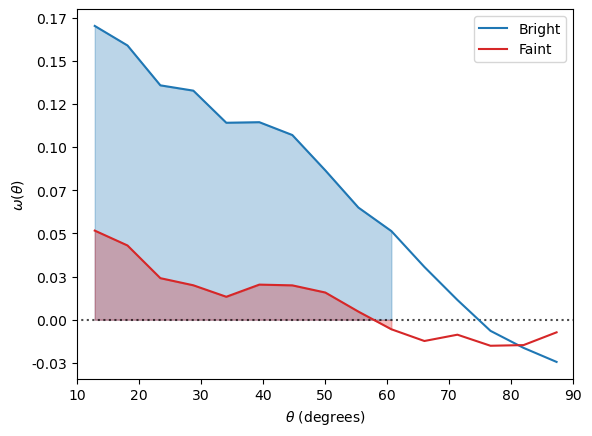

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.hlines(0.,0.,90.,ls=':',color='k',alpha=.7)

ax.plot(r, xib, color='C0', label='Bright')
ax.plot(r, xif, color='C3', label='Faint')

ax.fill_between(r[:-cutoff], y1=xib[:-cutoff], \
                color='C0', alpha=.3)
ax.fill_between(r[:-cutoff], y1=xif[:-cutoff], \
                color='C3', alpha=.3)


ax.legend()

ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel(r'$\omega(\theta)$')

ax.set_xlim([10.,90.])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()
